In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
df = pd.read_csv('../data/global_cancer_patients_2015_2024.csv')
print(df.head())
print(df.info())

  Patient_ID  Age  Gender Country_Region  Year  Genetic_Risk  Air_Pollution  \
0  PT0000000   71    Male             UK  2021           6.4            2.8   
1  PT0000001   34    Male          China  2021           1.3            4.5   
2  PT0000002   80    Male       Pakistan  2023           7.4            7.9   
3  PT0000003   40    Male             UK  2015           1.7            2.9   
4  PT0000004   43  Female         Brazil  2017           5.1            2.8   

   Alcohol_Use  Smoking  Obesity_Level Cancer_Type Cancer_Stage  \
0          9.5      0.9            8.7        Lung    Stage III   
1          3.7      3.9            6.3    Leukemia      Stage 0   
2          2.4      4.7            0.1      Breast     Stage II   
3          4.8      3.5            2.7       Colon      Stage I   
4          2.3      6.7            0.5        Skin    Stage III   

   Treatment_Cost_USD  Survival_Years  Target_Severity_Score  
0            62913.44             5.9                   4.9

In [127]:
# Missing values are checked for each column
print("Missing values:\n", df.isna().sum())

Missing values:
 Patient_ID               0
Age                      0
Gender                   0
Country_Region           0
Year                     0
Genetic_Risk             0
Air_Pollution            0
Alcohol_Use              0
Smoking                  0
Obesity_Level            0
Cancer_Type              0
Cancer_Stage             0
Treatment_Cost_USD       0
Survival_Years           0
Target_Severity_Score    0
dtype: int64


In [128]:
# The average patient age was calculated for each cancer type.
avg_age_by_cancer = df.groupby("Cancer_Type")["Age"].mean()
print(avg_age_by_cancer.head())

Cancer_Type
Breast      54.246405
Cervical    54.713436
Colon       54.708595
Leukemia    54.173157
Liver       54.192671
Name: Age, dtype: float64


In [129]:
#distribution of genders among patients was counted.
gender_dist = df["Gender"].value_counts()
print(gender_dist)

Gender
Male      16796
Female    16709
Other     16495
Name: count, dtype: int64


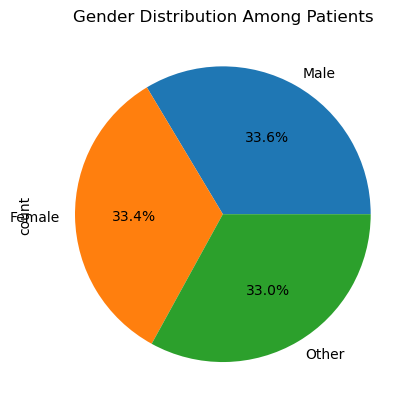

In [130]:
df["Gender"].value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.title("Gender Distribution Among Patients")
plt.show()

In [131]:
#The average severity score was computed for each country.
severity_by_country = df.groupby("Country_Region")["Target_Severity_Score"].mean()
print(severity_by_country.head())

Country_Region
Australia    4.946477
Brazil       4.934291
Canada       4.962305
China        4.937570
Germany      4.944063
Name: Target_Severity_Score, dtype: float64


In [132]:
#The number of patients was counted for each cancer type.
cancer_count = df["Cancer_Type"].value_counts()
print(cancer_count.head())

Cancer_Type
Colon       6376
Prostate    6308
Leukemia    6266
Liver       6249
Skin        6231
Name: count, dtype: int64


In [133]:
#average treatment cost was measured for each stage of cancer.
cost_by_stage = df.groupby("Cancer_Stage")["Treatment_Cost_USD"].mean()
print(cost_by_stage)

Cancer_Stage
Stage 0      52572.589493
Stage I      52674.079638
Stage II     52082.841258
Stage III    52708.197506
Stage IV     52302.471041
Name: Treatment_Cost_USD, dtype: float64


In [134]:
#severity score was averaged by smoking status to assess its effect.
severity_by_smoking = df.groupby("Smoking")["Target_Severity_Score"].mean()
print(severity_by_smoking.head())

Smoking
0.0    3.918577
0.1    4.031002
0.2    4.017859
0.3    4.023889
0.4    4.056151
Name: Target_Severity_Score, dtype: float64


In [135]:
#total number of survival years was summed for each country.
survival_by_country = df.groupby("Country_Region")["Survival_Years"].sum()
print(survival_by_country.head())

Country_Region
Australia    25439.5
Brazil       25069.1
Canada       24465.4
China        24201.9
Germany      25325.9
Name: Survival_Years, dtype: float64


In [136]:
#Top 10 countries by genetic risk
top_genetic_risk = df.groupby("Country_Region")["Genetic_Risk"].mean().nlargest(10)
print(top_genetic_risk)

Country_Region
Canada       5.093668
USA          5.048024
Pakistan     5.014901
Australia    5.011724
UK           4.995198
China        4.987665
Russia       4.977756
India        4.969762
Germany      4.969725
Brazil       4.950879
Name: Genetic_Risk, dtype: float64


In [137]:
#average treatment cost was calculated for each year.
cost_by_year = df.groupby("Year")["Treatment_Cost_USD"].mean()
print(cost_by_year)

Year
2015    52319.451022
2016    52534.460695
2017    52475.275126
2018    52771.862176
2019    52458.473704
2020    52329.496771
2021    52420.457548
2022    52452.054220
2023    52115.279315
2024    52796.542251
Name: Treatment_Cost_USD, dtype: float64


In [138]:
#Gender distribution was computed within each cancer type.
gender_by_cancer = df.groupby("Cancer_Type")["Gender"].value_counts()
print(gender_by_cancer.head())

Cancer_Type  Gender
Breast       Male      2080
             Other     2058
             Female    2051
Cervical     Female    2160
             Other     2034
Name: count, dtype: int64


In [139]:
#severity score for lung cancer was averaged by pollution level.
lung_pollution = df[df["Cancer_Type"] == "Lung"].groupby("Air_Pollution")["Target_Severity_Score"].mean()
print(lung_pollution.head())

Air_Pollution
0.0    4.274000
0.1    4.198286
0.2    4.055000
0.3    4.186393
0.4    4.200364
Name: Target_Severity_Score, dtype: float64


In [140]:
#Average survival years were calculated for each cancer stage.
survival_by_stage = df.groupby("Cancer_Stage")["Survival_Years"].mean()
print(survival_by_stage)

Cancer_Stage
Stage 0      5.015199
Stage I      5.012990
Stage II     4.995170
Stage III    5.036311
Stage IV     4.972596
Name: Survival_Years, dtype: float64


In [141]:
#Patients were grouped by age bins and counted.
age_bins = pd.cut(df["Age"], bins=[0, 30, 50, 70, 100])
age_dist = df.groupby(age_bins, observed=True)["Patient_ID"].count()
print(age_dist)

Age
(0, 30]       7884
(30, 50]     14408
(50, 70]     14116
(70, 100]    13592
Name: Patient_ID, dtype: int64


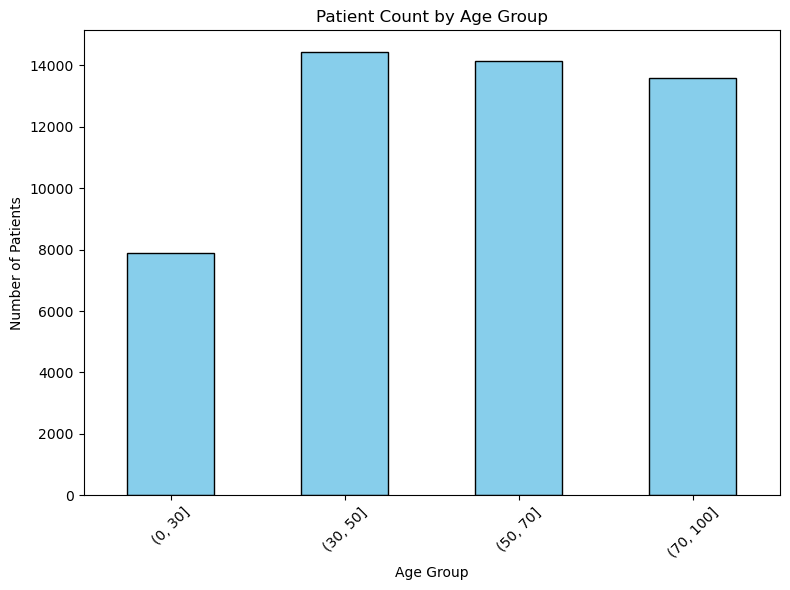

In [142]:
plt.figure(figsize=(8, 6))
age_dist.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Patient Count by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [143]:
#The average treatment cost was calculated for each obesity level.
cost_by_obesity = df.groupby("Obesity_Level")["Treatment_Cost_USD"].mean()
print(cost_by_obesity.head())

Obesity_Level
0.0    51586.309545
0.1    53483.577168
0.2    53601.557196
0.3    51900.987105
0.4    51338.836798
Name: Treatment_Cost_USD, dtype: float64


In [144]:
#number of patients was counted per country and year.
patients_by_country_year = df.groupby(["Country_Region", "Year"])["Patient_ID"].count()
print(patients_by_country_year.head())

Country_Region  Year
Australia       2015    515
                2016    516
                2017    484
                2018    492
                2019    525
Name: Patient_ID, dtype: int64


In [145]:
# Top 5 cancer types with the highest average treatment cost were listed.
top_cost_cancers = df.groupby("Cancer_Type")["Treatment_Cost_USD"].mean().nlargest(5)
print(top_cost_cancers)

Cancer_Type
Lung        53130.622060
Prostate    52620.302254
Leukemia    52528.469202
Breast      52484.264228
Liver       52460.606886
Name: Treatment_Cost_USD, dtype: float64


In [146]:
#The distribution of cancer stages was determined for each cancer type.
stage_by_cancer = df.groupby("Cancer_Type")["Cancer_Stage"].value_counts()
print(stage_by_cancer.head())

Cancer_Type  Cancer_Stage
Breast       Stage II        1273
             Stage III       1270
             Stage 0         1231
             Stage I         1212
             Stage IV        1203
Name: count, dtype: int64


In [147]:
#average genetic risk was calculated separately for each gender.
genetic_by_gender = df.groupby("Gender")["Genetic_Risk"].mean()
print(genetic_by_gender)

Gender
Female    5.005548
Male      4.993516
Other     5.006129
Name: Genetic_Risk, dtype: float64


In [148]:
#Survival years were averaged by alcohol use category.
survival_by_alcohol = df.groupby("Alcohol_Use")["Survival_Years"].mean()
print(survival_by_alcohol.head())

Alcohol_Use
0.0    5.379310
0.1    4.954108
0.2    4.994410
0.3    5.116601
0.4    5.001237
Name: Survival_Years, dtype: float64


In [149]:
#Patients were counted for each country.
patients_by_country = df["Country_Region"].value_counts()
print(patients_by_country.head())

Country_Region
Australia    5092
UK           5060
USA          5060
India        5040
Germany      5024
Name: count, dtype: int64


In [150]:
#Cancer type frequency was calculated for each age category.
age_cancer_dist = df.groupby(
    pd.cut(df["Age"], bins=[0, 30, 50, 70, 100]), 
    observed=False
)["Cancer_Type"].value_counts()
print(age_cancer_dist.head())


Age      Cancer_Type
(0, 30]  Leukemia       1026
         Liver          1016
         Skin           1005
         Breast          990
         Prostate        988
Name: count, dtype: int64


In [151]:
#The mean treatment cost was calculated for each country.
cost_by_country = df.groupby("Country_Region")["Treatment_Cost_USD"].mean()
print(cost_by_country.head())

Country_Region
Australia    52621.637121
Brazil       52540.892254
Canada       52584.225541
China        52899.413814
Germany      52769.251439
Name: Treatment_Cost_USD, dtype: float64


In [152]:
#severity of lung cancer was analyzed based on smoking habits.
lung_smoking = df[df["Cancer_Type"] == "Lung"].groupby("Smoking")["Target_Severity_Score"].mean()
print(lung_smoking.head())

Smoking
0.0    3.941290
0.1    4.428333
0.2    3.883846
0.3    4.004688
0.4    4.076901
Name: Target_Severity_Score, dtype: float64


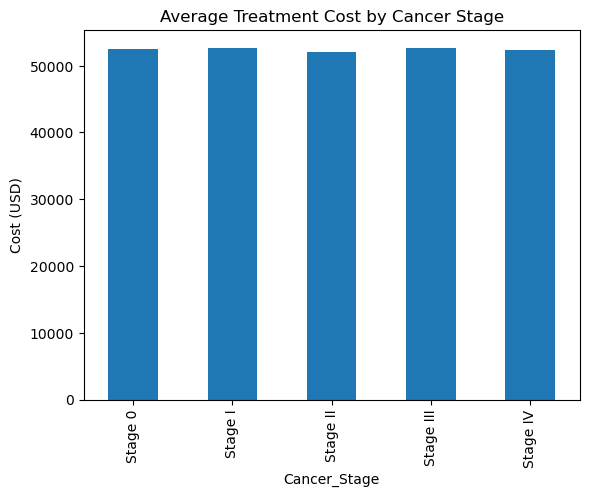

In [153]:
df.groupby("Cancer_Stage")["Treatment_Cost_USD"].mean().plot(kind="bar")
plt.title("Average Treatment Cost by Cancer Stage")
plt.ylabel("Cost (USD)")
plt.show()

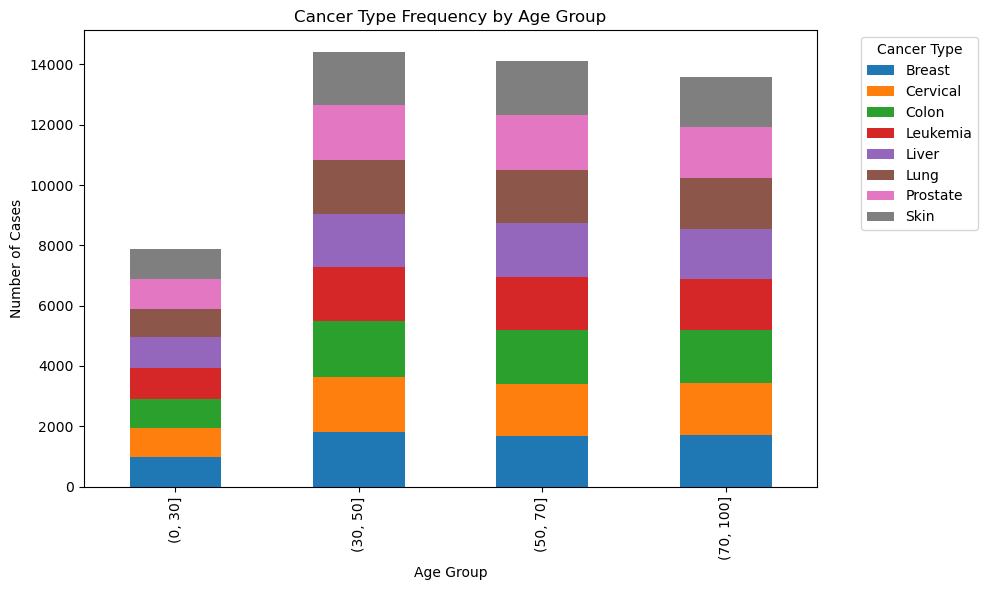

In [154]:
#Cancer Type Frequency by Age Group
age_cancer_df = age_cancer_dist.unstack().fillna(0)
age_cancer_df.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Cancer Type Frequency by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Cases")
plt.legend(title="Cancer Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()